In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results_folder = '../results/firing_rates_1e5/'

In [3]:
kraskov = {}
copulas = {}
for region_result in os.listdir(results_folder):
    print(region_result)
    results_path = os.path.join(results_folder, region_result, "100000")
    try:
        TC_filename = os.path.join(results_path, "tc_samples.txt")
        DTC_filename = os.path.join(results_path, "dtc_samples.txt")
        TC_matrix = np.loadtxt(TC_filename, delimiter=",")
        DTC_matrix = np.loadtxt(DTC_filename, delimiter=",")
    except:
        TC_filename = os.path.join(results_path, "tc_samples.npy")
        DTC_filename = os.path.join(results_path, "dtc_samples.npy")
        TC_matrix = np.load(TC_filename)
        DTC_matrix = np.load(DTC_filename)
    TC_list, TC_std = TC_matrix.mean(axis=0), TC_matrix.std(axis=0)
    DTC_list, DTC_std = DTC_matrix.mean(axis=0), DTC_matrix.std(axis=0)
    if "kraskov" in region_result:
        kraskov[region_result] = {}
        kraskov[region_result]["TC_list"] = TC_list
        kraskov[region_result]["TC_std"] = TC_std
        kraskov[region_result]["DTC_list"] = DTC_list
        kraskov[region_result]["DTC_std"] = DTC_std
    if "copulas" in region_result:
        copulas[region_result] = {}
        copulas[region_result]["TC_list"] = TC_list
        copulas[region_result]["TC_std"] = TC_std
        copulas[region_result]["DTC_list"] = DTC_list
        copulas[region_result]["DTC_std"] = DTC_std

copulas_no_dmn
kraskov_dmn
kraskov_no_dmn_drug
kraskov_visual_drug
copulas_visual
kraskov_no_dmn
kraskov_visual
kraskov_dmn_drug
copulas_dmn


In [4]:
def barPosition(var, n_vars):
    separation =1
    width=0.8
    if n_vars%2==0:
        return ((var-n_vars/2)/n_vars)*width*separation
    else:
        return ((var-n_vars/2)/n_vars)*width*separation-width/(2*n_vars)

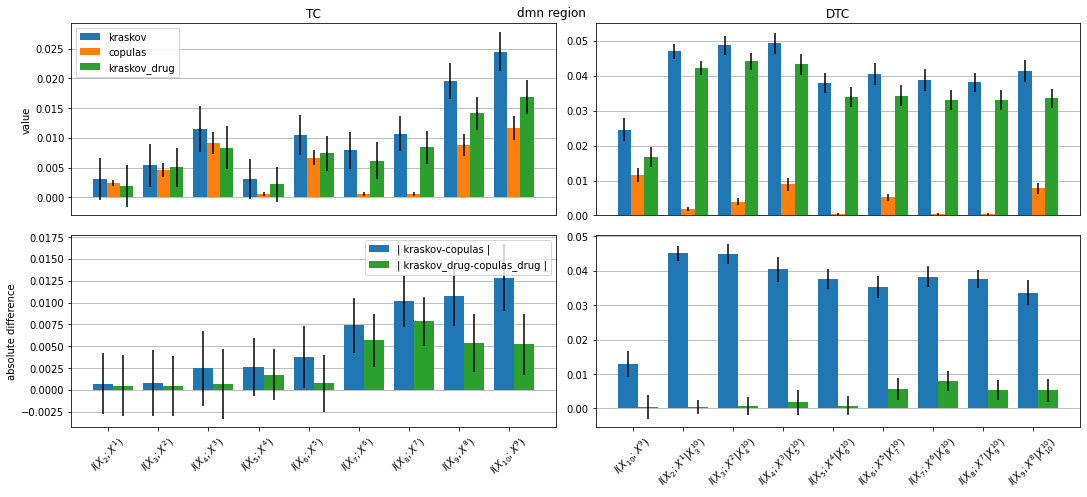

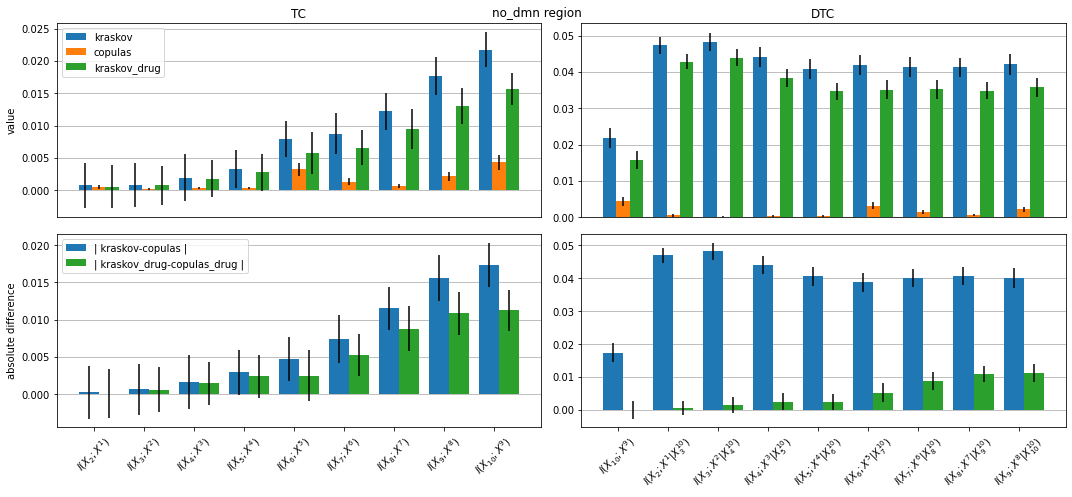

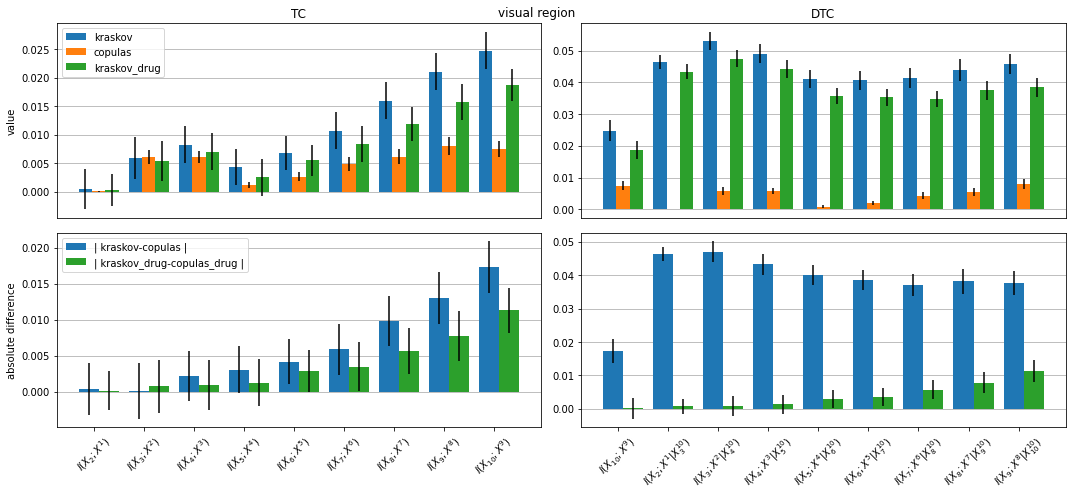

In [23]:
barwidth = 0.8/3
for i, region in enumerate(["dmn", "no_dmn", "visual"]):
    # Retrieve Data
    kraskov_data = kraskov[f"kraskov_{region}"]
    kraskov_drug_data = kraskov[f"kraskov_{region}_drug"]
    copulas_data = copulas[f"copulas_{region}"]
    #copulas_drug_data = copulas[f"copulas_{region}_drug"]
    copulas_drug_data = copulas[f"copulas_{region}"]
    
    # Kraskov TC/DTC
    kraskov_TC, kraskov_DTC = kraskov_data["TC_list"], kraskov_data["DTC_list"]
    kraskov_TC_std, kraskov_DTC_std = kraskov_data["TC_std"], kraskov_data["DTC_std"]
    # Kraskov Drug TC/DTC
    kraskov_drug_TC, kraskov_drug_DTC = kraskov_drug_data["TC_list"], kraskov_drug_data["DTC_list"]
    kraskov_drug_TC_std, kraskov_drug_DTC_std = kraskov_drug_data["TC_std"], kraskov_drug_data["DTC_std"]
    # Copulas TC/DTC
    copulas_TC, copulas_DTC = copulas_data["TC_list"], copulas_data["DTC_list"]
    copulas_TC_std, copulas_DTC_std = copulas_data["TC_std"], copulas_data["DTC_std"]
    # Copulas Drug TC/DTC
    copulas_drug_TC, copulas_drug_DTC = copulas_drug_data["TC_list"], copulas_drug_data["DTC_list"]
    copulas_drug_TC_std, copulas_drug_DTC_std = copulas_drug_data["TC_std"], copulas_drug_data["DTC_std"]
    
    # Comparison TC/DTC
    TC_comp = abs(kraskov_TC - copulas_TC)
    DTC_comp = abs(kraskov_DTC - copulas_DTC)
    TC_comp_drug = abs(kraskov_drug_TC - copulas_drug_TC)
    DTC_comp_drug = abs(kraskov_drug_TC - copulas_drug_TC)
    
    # Figure
    fig, ax = plt.subplots(2, 2, figsize=(15,7))    
    
    # Real vs Methods
    # TC
    ax[0, 0].bar(np.arange(len(kraskov_TC))+barPosition(1, 3), kraskov_TC, yerr=kraskov_TC_std, width=barwidth, label="kraskov", zorder=3, color="C0")
    ax[0, 0].bar(np.arange(len(copulas_TC))+barPosition(2, 3), copulas_TC, yerr=copulas_TC_std, width=barwidth, label="copulas", zorder=3, color="C1")
    ax[0, 0].bar(np.arange(len(kraskov_drug_TC))+barPosition(3, 3), kraskov_drug_TC, yerr=kraskov_drug_TC_std, width=barwidth, label="kraskov_drug", zorder=3, color="C2")
    ax[0, 0].grid(axis='y')
    ax[0, 0].legend()
    ax[0, 0].set_xticks([])
    ax[0, 0].set_ylabel("value")
    ax[0, 0].set_title("TC")
    #ax[0, 0].set_ylim([0, 13])
    # DTC
    ax[0, 1].bar(np.arange(len(kraskov_DTC))+barPosition(1, 3), kraskov_DTC, yerr=kraskov_DTC_std, width=barwidth, label="kraskov", zorder=3)
    ax[0, 1].bar(np.arange(len(copulas_DTC))+barPosition(2, 3), copulas_DTC, yerr=copulas_DTC_std, width=barwidth, label="copulas", zorder=3)
    ax[0, 1].bar(np.arange(len(kraskov_drug_DTC))+barPosition(3, 3), kraskov_drug_DTC, yerr=kraskov_drug_DTC_std, width=barwidth, label="kraskov_drug", zorder=3)
    ax[0, 1].grid(axis='y')
    #ax[0, 1].legend()
    ax[0, 1].set_xticks([])
    ax[0, 1].set_title("DTC")
    #ax[0, 1].set_ylim([0, 13])
    
    # Absolute difference vs methods
    # TC
    TC_labels = [r"$I(X_{}; X^{})$".format('{'+str(i+2)+'}','{'+str(i+1)+'}') for i in range(len(kraskov_TC))]
    ax[1, 0].bar(np.arange(len(TC_labels))+barPosition(1, 2), TC_comp, yerr=np.sqrt((kraskov_TC_std)**2 + (copulas_TC_std)**2), width=0.4, zorder=3, label="| kraskov-copulas |", color="C0")
    ax[1, 0].bar(np.arange(len(TC_labels))+barPosition(2, 2), TC_comp_drug, yerr=np.sqrt((kraskov_drug_TC_std)**2 + (copulas_drug_TC_std)**2), width=0.4, zorder=3, label="| kraskov_drug-copulas_drug |", color="C2")
    ax[1, 0].grid(axis='y')
    ax[1, 0].set_xticks(np.arange(len(TC_labels))+0.1)
    ax[1, 0].set_xticklabels(TC_labels, rotation=45)
    ax[1, 0].set_ylabel("absolute difference")
    ax[1, 0].legend()
    #ax[1, 0].set_ylim([0, 1.1])
    
    # DTC
    DTC_labels =[r"$I(X_{}; X^{})$".format('{'+str(len(kraskov_TC)+1)+'}','{'+str(len(kraskov_TC))+'}')] + [r'$I(X_{}; X^{}|X^{}_{})$'.format('{'+str(i+2)+'}', i+1 ,'{'+str(len(kraskov_DTC)+1)+'}', '{'+str(i+3)+'}') for i in range(len(kraskov_DTC)-1)] 
    ax[1, 1].bar(np.arange(len(DTC_labels))+barPosition(1, 2), DTC_comp, yerr=np.sqrt((kraskov_DTC_std)**2 + (copulas_DTC_std)**2), width=0.4, zorder=3, label="| kraskov-copulas |", color="C0")
    ax[1, 1].bar(np.arange(len(DTC_labels))+barPosition(2, 2), DTC_comp_drug, yerr=np.sqrt((kraskov_drug_DTC_std)**2 + (copulas_drug_DTC_std)**2), width=0.4, zorder=3, label="| kraskov_drug-copulas_drug |", color="C2")
    ax[1, 1].grid(axis='y')
    ax[1, 1].set_xticks(np.arange(len(DTC_labels))+0.1)
    ax[1, 1].set_xticklabels(DTC_labels, rotation=45)
    #ax[1, 1].legend()
    #ax[1, 1].set_ylim([0, 1.1])
    
    plt.suptitle(f"{region} region")
    
    plt.tight_layout()
    plt.show()
    #fig.savefig(f'./plots/barras/bars{i_gaussian}.pdf', dpi=500)